**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN6**<br>
**Name: "activation_functions.ipynb"**<br>

**Description:**<br> 
**Defining and plotting the `sigmoid` and `ReLU` activation functions,**<br>
**used in Neural Networks, along with their first derivatives**

**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**2. QS -> Quark Star**<br>
**3. DL -> Deep Learning**

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [2]:
# Useful symbols
x = smp.symbols("x",Real=True)

In [3]:
# Symbolic definition of Sigmoid activation function
def sigmoid_sym(x):
    return pow(1+smp.exp(-x),-1)

# Symbolic definition of ReLU activation function
def ReLU_sym(x):
    case1 = (x,smp.Ge(x,0))
    case2 = (0,smp.Lt(x,0))
    return smp.Piecewise(case1,case2) 

In [4]:
# Symbolic defintion of Sigmoid first derivative
def d_sigmoid_sym(x):
    y = smp.symbols("y",Real=True)
    return sigmoid_sym(y).diff(y).subs(y,x)

# Symbolic defintion of ReLU first derivative
def d_ReLU_sym(x):
    y = smp.symbols("y",Real=True)
    return ReLU_sym(y).diff(y).subs(y,x)

In [5]:
# Display of activation functions and their first derivatives

# Sigmoid
print("Sigmoid")
print(100*"=")
print("> Function g(x):")
display(sigmoid_sym(x))
print(100*"-")
print("> 1st Derivative g\'(x):")
display(d_sigmoid_sym(x))
print(100*"=")

# ReLU
print("\n\nReLU")
print(100*"=")
print("> Function g(x):")
display(ReLU_sym(x))
print(100*"-")
print("> 1st Derivative g\'(x):")
display(d_ReLU_sym(x))
print(100*"=")

Sigmoid
> Function g(x):


1/(1 + exp(-x))

----------------------------------------------------------------------------------------------------
> 1st Derivative g'(x):


exp(-x)/(1 + exp(-x))**2



ReLU
> Function g(x):


Piecewise((x, x >= 0), (0, True))

----------------------------------------------------------------------------------------------------
> 1st Derivative g'(x):


Piecewise((1, x >= 0), (0, True))

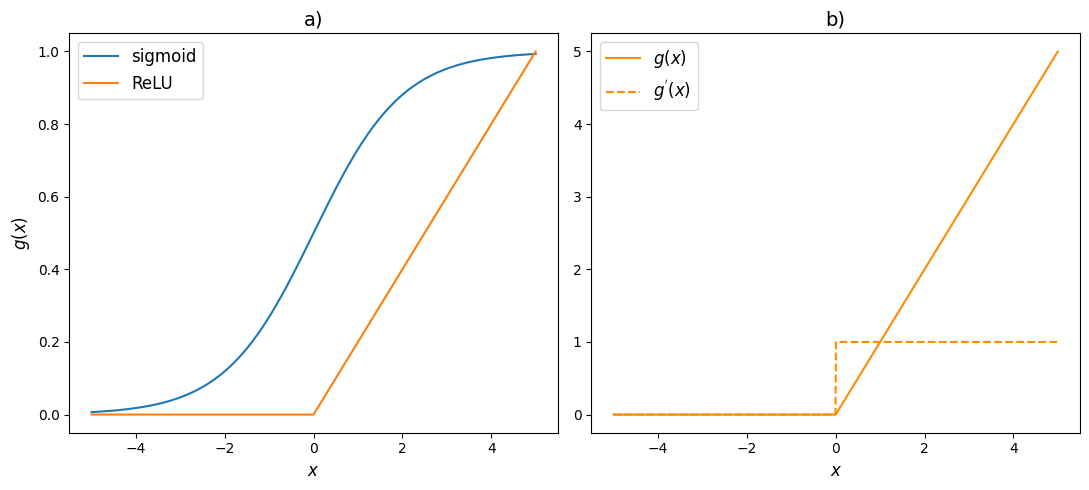

In [ ]:
# Plotting the activation functions and their derivatives

# Numerical definition
sigmoid = smp.lambdify(x,sigmoid_sym(x),"numpy")

ReLU = smp.lambdify(x,ReLU_sym(x),"numpy")
d_ReLU = smp.lambdify(x,d_ReLU_sym(x),"numpy")

# Definition of linspace
x_range= np.linspace(-5,5,1000)

# Initializing of figures
fig_activ_func, axes_activ_func = plt.subplots(1,2,figsize=(11,5))

# Functions plot
axes_activ_func[0].plot(x_range,sigmoid(x_range),lw=1.5,label="sigmoid")
axes_activ_func[0].plot(x_range,ReLU(x_range)/5,lw=1.5,label="ReLU") # scaling down by 5 for ease of comparison with sigmoid

# ReLU function and derivative plot
axes_activ_func[1].plot(x_range,ReLU(x_range),lw=1.5,color="darkorange",label=r"$g(x)$")
axes_activ_func[1].plot(x_range,d_ReLU(x_range),"--",lw=1.5,color="darkorange",label=r"$g^{'}(x)$")

# Adding labels, title and legends for clarity
axes_activ_func[0].set_xlabel(r"$x$",fontsize=12)
axes_activ_func[0].set_ylabel(r"$g(x)$",fontsize=12)
axes_activ_func[0].set_title("a)",fontsize=14)
axes_activ_func[0].legend(fontsize=12)

axes_activ_func[1].set_xlabel(r"$x$",fontsize=12)
axes_activ_func[1].set_title("b)",fontsize=14)
axes_activ_func[1].legend(fontsize=12)


fig_activ_func.tight_layout()
#fig_activ_func.savefig("ANN_activ_func.pdf",dpi=300)